<a href="https://colab.research.google.com/github/gaiobr/aprendizado-de-maquina-edge-ufal/blob/master/Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados de Qualidade de Vinho Tinto**

Dataset com dados fisíco-químicos e sensorial sobre vinhos tintos da denominação de origem controlada "Vinho Verde".

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009



In [2]:
  from google.colab import drive
  drive.mount('/content/drive/')

Mounted at /content/drive/


## **1. Importar bibliotecas**

In [123]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

## **2. Carregar conjunto de dados**

In [124]:
# Carregar dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/winequality-red.csv')

In [125]:
# Verificar dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **3. Limpar e organizar os dados**

In [126]:
# Verificar e excluir valores NaN, ? ou dados faltantes
df = df.dropna()

In [127]:
# Substituir espaço por underline nos nomes das colunas
df.columns = df.columns.str.replace(' ', '_')

## **4. Re-escalar os dados**

### **Re-escalar usando máximo e mínimo**

In [128]:
df.iloc[:,:-1] = (df.iloc[:,:-1] - df.iloc[:,:-1].min())/(df.iloc[:,:-1].max()-df.iloc[:,:-1].min())

In [129]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [130]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,5.636023
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.807569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,5.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,6.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


## **5. Organizar os dados para modelagem**

### **Dividir os dados entre atributos descritores e atributos de classe (target)**

In [131]:
# Dividir dados em atributos descritores e atributo de classe
df_x = df.iloc[:,:-1]
df_x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [132]:
df_y = df.quality
df_y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [133]:
df_y.unique()

array([5, 6, 7, 4, 8, 3])

## **6. Definir o algoritmo de agrupamento**

In [134]:
# Agrupamento
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Aplicar o modelo aos dados de teste**

In [135]:
kmeans_labels = kmeans.predict(df_x)
kmeans_labels

array([1, 1, 1, ..., 3, 3, 2], dtype=int32)

**Visualizar os resultados do agrupamento**

In [136]:
df_x = df_x.reset_index(drop=True)

In [137]:
# Adicionar labels ao teste para fins de visualização
grupos = pd.DataFrame(kmeans_labels)
df_x.insert((df_x.shape[1]), 'quality', grupos)

In [138]:
df_x.quality.unique()

array([1, 0, 5, 3, 4, 2], dtype=int32)

In [157]:
F = df_x[df_x['quality']==5]
E = df_x[df_x['quality']==4]
D = df_x[df_x['quality']==3]
C = df_x[df_x['quality']==2]
B = df_x[df_x['quality']==1]
A = df_x[df_x['quality']==0]


In [158]:
F = F.iloc[:,:-1]
E = E.iloc[:,:-1]
D = D.iloc[:,:-1]
C = C.iloc[:,:-1]
B = B.iloc[:,:-1]
A = A.iloc[:,:-1]


In [159]:
D.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
12,0.088496,0.339041,0.00,0.047945,0.128548,0.211268,0.187279,0.310573,0.661417,0.113772,0.230769
45,0.000000,0.273973,0.15,0.082192,0.070117,0.098592,0.208481,0.244493,0.913386,0.137725,0.723077
94,0.035398,0.616438,0.04,0.034247,0.055092,0.563380,0.279152,0.273862,0.795276,0.089820,0.323077
95,0.008850,0.328767,0.17,0.095890,0.076795,0.225352,0.353357,0.229809,0.874016,0.161677,0.692308
131,0.088496,0.260274,0.09,0.095890,0.061770,0.225352,0.328622,0.266520,0.700787,0.179641,0.707692


In [160]:
plt.rcParams['figure.figsize'] = (8,5)

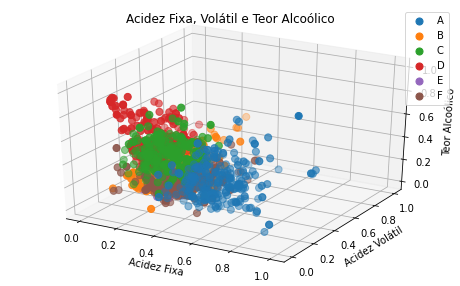

In [161]:
# Plotar alguns atributos das classes
ax = plt.axes(projection = '3d')
ax.scatter3D(A.fixed_acidity, A.volatile_acidity, A.alcohol, s = 50, label = 'A')
ax.scatter3D(B.fixed_acidity, B.volatile_acidity, B.alcohol, s = 50, label = 'B')
ax.scatter3D(C.fixed_acidity, C.volatile_acidity, C.alcohol, s = 50, label = 'C')
ax.scatter3D(D.fixed_acidity, D.volatile_acidity, D.alcohol, s = 50, label = 'D')
ax.scatter3D(E.fixed_acidity, E.volatile_acidity, E.alcohol, s = 50, label = 'E')
ax.scatter3D(F.fixed_acidity, F.volatile_acidity, F.alcohol, s = 50, label = 'F')
plt.legend()
ax.set_xlabel('Acidez Fixa')
ax.set_ylabel('Acidez Volátil')
ax.set_zlabel('Teor Alcoólico')
plt.title('Acidez Fixa, Volátil e Teor Alcoólico')
plt.show()

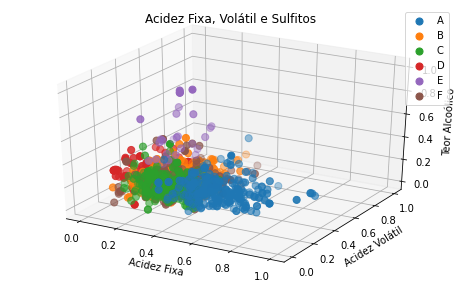

In [162]:
# Plotar alguns atributos das classes
ax = plt.axes(projection = '3d')
ax.scatter3D(A.fixed_acidity, A.volatile_acidity, A.sulphates, s = 50, label = 'A')
ax.scatter3D(B.fixed_acidity, B.volatile_acidity, B.sulphates, s = 50, label = 'B')
ax.scatter3D(C.fixed_acidity, C.volatile_acidity, C.sulphates, s = 50, label = 'C')
ax.scatter3D(D.fixed_acidity, D.volatile_acidity, D.sulphates, s = 50, label = 'D')
ax.scatter3D(E.fixed_acidity, E.volatile_acidity, E.sulphates, s = 50, label = 'E')
ax.scatter3D(F.fixed_acidity, F.volatile_acidity, F.sulphates, s = 50, label = 'F')
plt.legend()
ax.set_xlabel('Acidez Fixa')
ax.set_ylabel('Acidez Volátil')
ax.set_zlabel('Teor Alcoólico')
plt.title('Acidez Fixa, Volátil e Sulfitos')
plt.show()

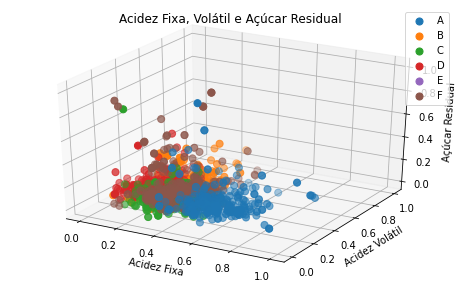

In [163]:
# Plotar alguns atributos das classes
ax = plt.axes(projection = '3d')
ax.scatter3D(A.fixed_acidity, A.volatile_acidity, A.residual_sugar, s = 50, label = 'A')
ax.scatter3D(B.fixed_acidity, B.volatile_acidity, B.residual_sugar, s = 50, label = 'B')
ax.scatter3D(C.fixed_acidity, C.volatile_acidity, C.residual_sugar, s = 50, label = 'C')
ax.scatter3D(D.fixed_acidity, D.volatile_acidity, D.residual_sugar, s = 50, label = 'D')
ax.scatter3D(E.fixed_acidity, E.volatile_acidity, E.residual_sugar, s = 50, label = 'E')
ax.scatter3D(F.fixed_acidity, F.volatile_acidity, F.residual_sugar, s = 50, label = 'F')
plt.legend()
ax.set_xlabel('Acidez Fixa')
ax.set_ylabel('Acidez Volátil')
ax.set_zlabel('Açúcar Residual')
plt.title('Acidez Fixa, Volátil e Açúcar Residual')
plt.show()

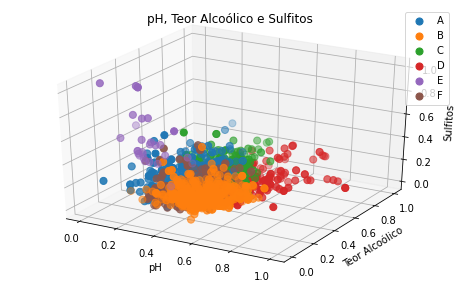

In [164]:
# Plotar alguns atributos das classes
ax = plt.axes(projection = '3d')
ax.scatter3D(A.pH, A.alcohol, A.sulphates, s = 50, label = 'A')
ax.scatter3D(B.pH, B.alcohol, B.sulphates, s = 50, label = 'B')
ax.scatter3D(C.pH, C.alcohol, C.sulphates, s = 50, label = 'C')
ax.scatter3D(D.pH, D.alcohol, D.sulphates, s = 50, label = 'D')
ax.scatter3D(E.pH, E.alcohol, E.sulphates, s = 50, label = 'E')
ax.scatter3D(F.pH, F.alcohol, F.sulphates, s = 50, label = 'F')
plt.legend()
ax.set_xlabel('pH')
ax.set_ylabel('Teor Alcoólico')
ax.set_zlabel('Sulfitos')
plt.title('pH, Teor Alcoólico e Sulfitos')
plt.show()

In [165]:
plt.rcParams['figure.figsize'] = (25,20)

In [166]:
D.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.160556,0.335704,0.086837,0.092361,0.093702,0.255964,0.131589,0.307508,0.593805,0.181382,0.510034
std,0.068137,0.106186,0.099466,0.059179,0.031855,0.142104,0.090236,0.098537,0.107209,0.070134,0.138531
min,0.000000,0.109589,0.000000,0.020548,0.000000,0.028169,0.003534,0.009545,0.377953,0.023952,0.230769
25%,0.115044,0.267123,0.010000,0.061644,0.071786,0.165493,0.063604,0.252937,0.519685,0.137725,0.415385
50%,0.168142,0.321918,0.060000,0.082192,0.093489,0.225352,0.113074,0.320852,0.582677,0.167665,0.476923
75%,0.203540,0.383562,0.130000,0.097603,0.110184,0.366197,0.169611,0.379772,0.653543,0.221557,0.603846
max,0.336283,0.664384,0.660000,0.506849,0.248748,0.704225,0.399293,0.494126,1.000000,0.365269,0.861538


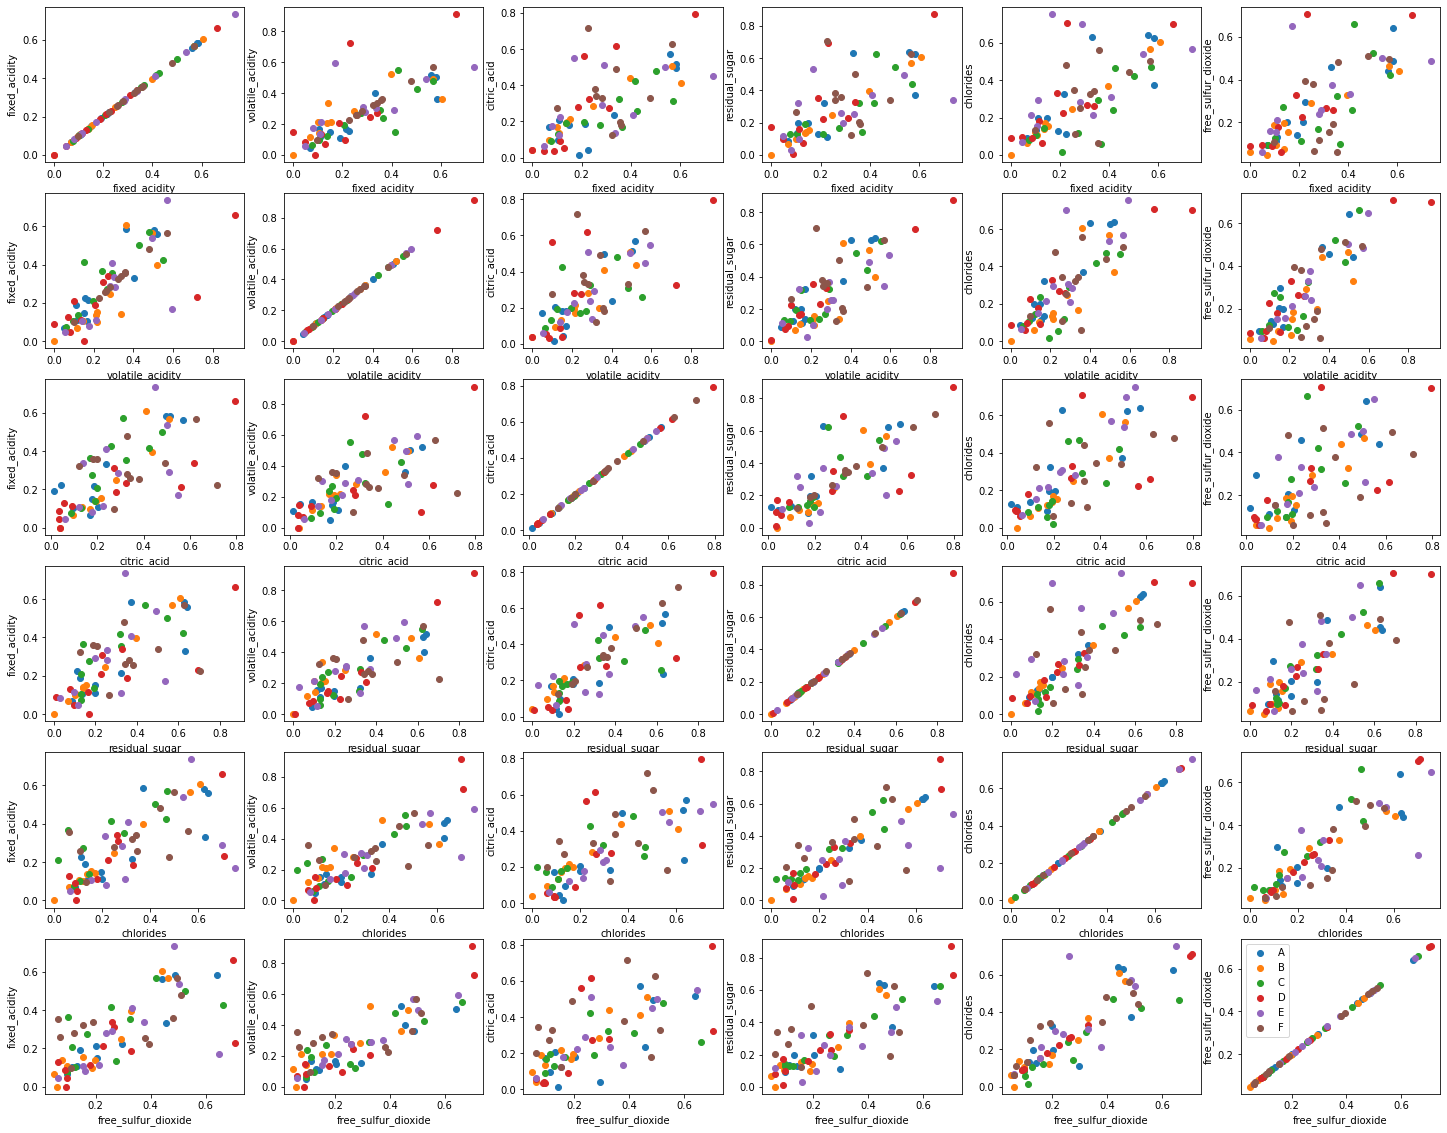

In [167]:
# Plotar comparação de alguns atributos
fig, axs = plt.subplots(6,6)
for i in range(6):
  for j in range(6):
    axs[i,j].scatter(A.iloc[i], A.iloc[j], label = 'A')
    axs[i,j].scatter(B.iloc[i], B.iloc[j], label = 'B')
    axs[i,j].scatter(C.iloc[i], C.iloc[j], label = 'C')
    axs[i,j].scatter(D.iloc[i], D.iloc[j], label = 'D')
    axs[i,j].scatter(E.iloc[i], E.iloc[j], label = 'E')
    axs[i,j].scatter(F.iloc[i], F.iloc[j], label = 'F')
    axs[i,j].set(xlabel = df_x.columns[i], ylabel = df_x.columns[j])
plt.legend()
plt.show()

## **7. Avaliar o modelo**

**Acurácia**

In [168]:
from sklearn.metrics import accuracy_score

In [170]:
acuracia = accuracy_score(df_y, kmeans_labels)
round(acuracia, 3)

0.136

**Índice Rand Ajustado**

In [171]:
from sklearn.metrics import adjusted_rand_score

In [172]:
rand_score = adjusted_rand_score(df_y, kmeans_labels)
rand_score

0.07642180528961072

**Scores baseados em informação mútua**

In [173]:
from sklearn.metrics import adjusted_mutual_info_score

In [174]:
mutual_info = adjusted_mutual_info_score(df_y, kmeans_labels)
mutual_info

0.09862381801081287

**Fowlkes-Mallows scores**

In [85]:
from sklearn.metrics import fowlkes_mallows_score

In [175]:
fm = fowlkes_mallows_score(df_y, kmeans_labels)
fm

0.33694267401525135

### **Métricas quando as classes não são conhecidas**

**Índice Davies-Boldin**

In [176]:
# Excluir a coluna quality
df_x = df_x.drop(columns=['quality'])

In [177]:
from sklearn.metrics import davies_bouldin_score

In [178]:
db = davies_bouldin_score(df_x, kmeans_labels)
db

1.3941076460647455

**Coeficiente de Silhueta**

In [179]:
from sklearn.metrics import silhouette_score

In [180]:
ss = silhouette_score(df_x, kmeans_labels, metric = 'euclidean')
ss

0.21010349938815626

**Índice Calinski-Harabasz**

In [181]:
from sklearn.metrics import calinski_harabasz_score

In [182]:
ch = calinski_harabasz_score(df_x,kmeans_labels)
ch

328.0233134081965

### **Agrupamento Hierárquico**

**Agrupamento Hierárquico Aglomerativo**

In [183]:
from sklearn.cluster import AgglomerativeClustering

**Definir o modelo e realizar o agrupamento**

In [184]:
hierarquico = AgglomerativeClustering(n_clusters=6)
labels_hierarquico = hierarquico.fit(df_x).labels_

In [185]:
labels_hierarquico

array([4, 4, 4, ..., 1, 1, 3])

### **Avaliar o modelo**


In [186]:
# Acurácia
acuracia = accuracy_score(df_y, labels_hierarquico)
round(acuracia, 3)

0.02

In [187]:
# Índice rand ajustado
rand_score = adjusted_rand_score(df_y, labels_hierarquico)
rand_score

0.0813313347188219

In [188]:
# Índice baseado em informação mútua
mutual_info = adjusted_mutual_info_score(df_y, labels_hierarquico)
mutual_info

0.11401717127457107

In [189]:
# Índice Fowlkes Mallows
fm = fowlkes_mallows_score(df_y, labels_hierarquico)
fm

0.3292446238409471

In [190]:
# Índice Daviews-Boldin
db = davies_bouldin_score(df_x, labels_hierarquico)
db

1.5439920988905274

In [191]:
# Coeficiente de silhueta
ss = silhouette_score(df_x, labels_hierarquico, metric='euclidean')
ss

0.15052429022570127

In [192]:
# Índice de Calinski-Harabasz
ch = calinski_harabasz_score(df_x, labels_hierarquico)
ch

278.2805024006147

## **8. Análise dos Resultados**

Como a coluna 'quality' já apresentava 6 categorias, foi atribuído o valor 6 para o número de clusters.

Ao combinar algumas variáveis para visualização 3D dos resultados, verificamos um padrão de agrupamento com os conjuntos de variáveis:
- Acidez Fixa, Acidez Volátil e Teor Alcoólico
e
- pH, Teor Alcoólico e Sulfitos
Há um ponto de sobreposição, mas com um maior agrupamento entre qualidade e características comuns

Já a análise exploratória dos dados com scatterplot não demonstra um padrão de agrupamento das categorias geradas.

**A avaliação dos modelos apresentou resultados muito baixos**

Todos os tipos de avaliação apresentaram valores tão baixos que o mais provável é que o conjunto de dados não seja suficiente para predizer os dados para os agrupamentos gerados